In [ ]:
import pandas as pd
from datetime import date,timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [ ]:
df = pd.read_csv('/content/adidas-quarterly-sales.csv')
print(df)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [ ]:
df.shape

(88, 2)

In [ ]:
import plotly.express as px
figure = px.line(df, x="Time Period",y="Revenue",title ="Quarterly Sales Revenue of Adidas in Millions")
figure.show()

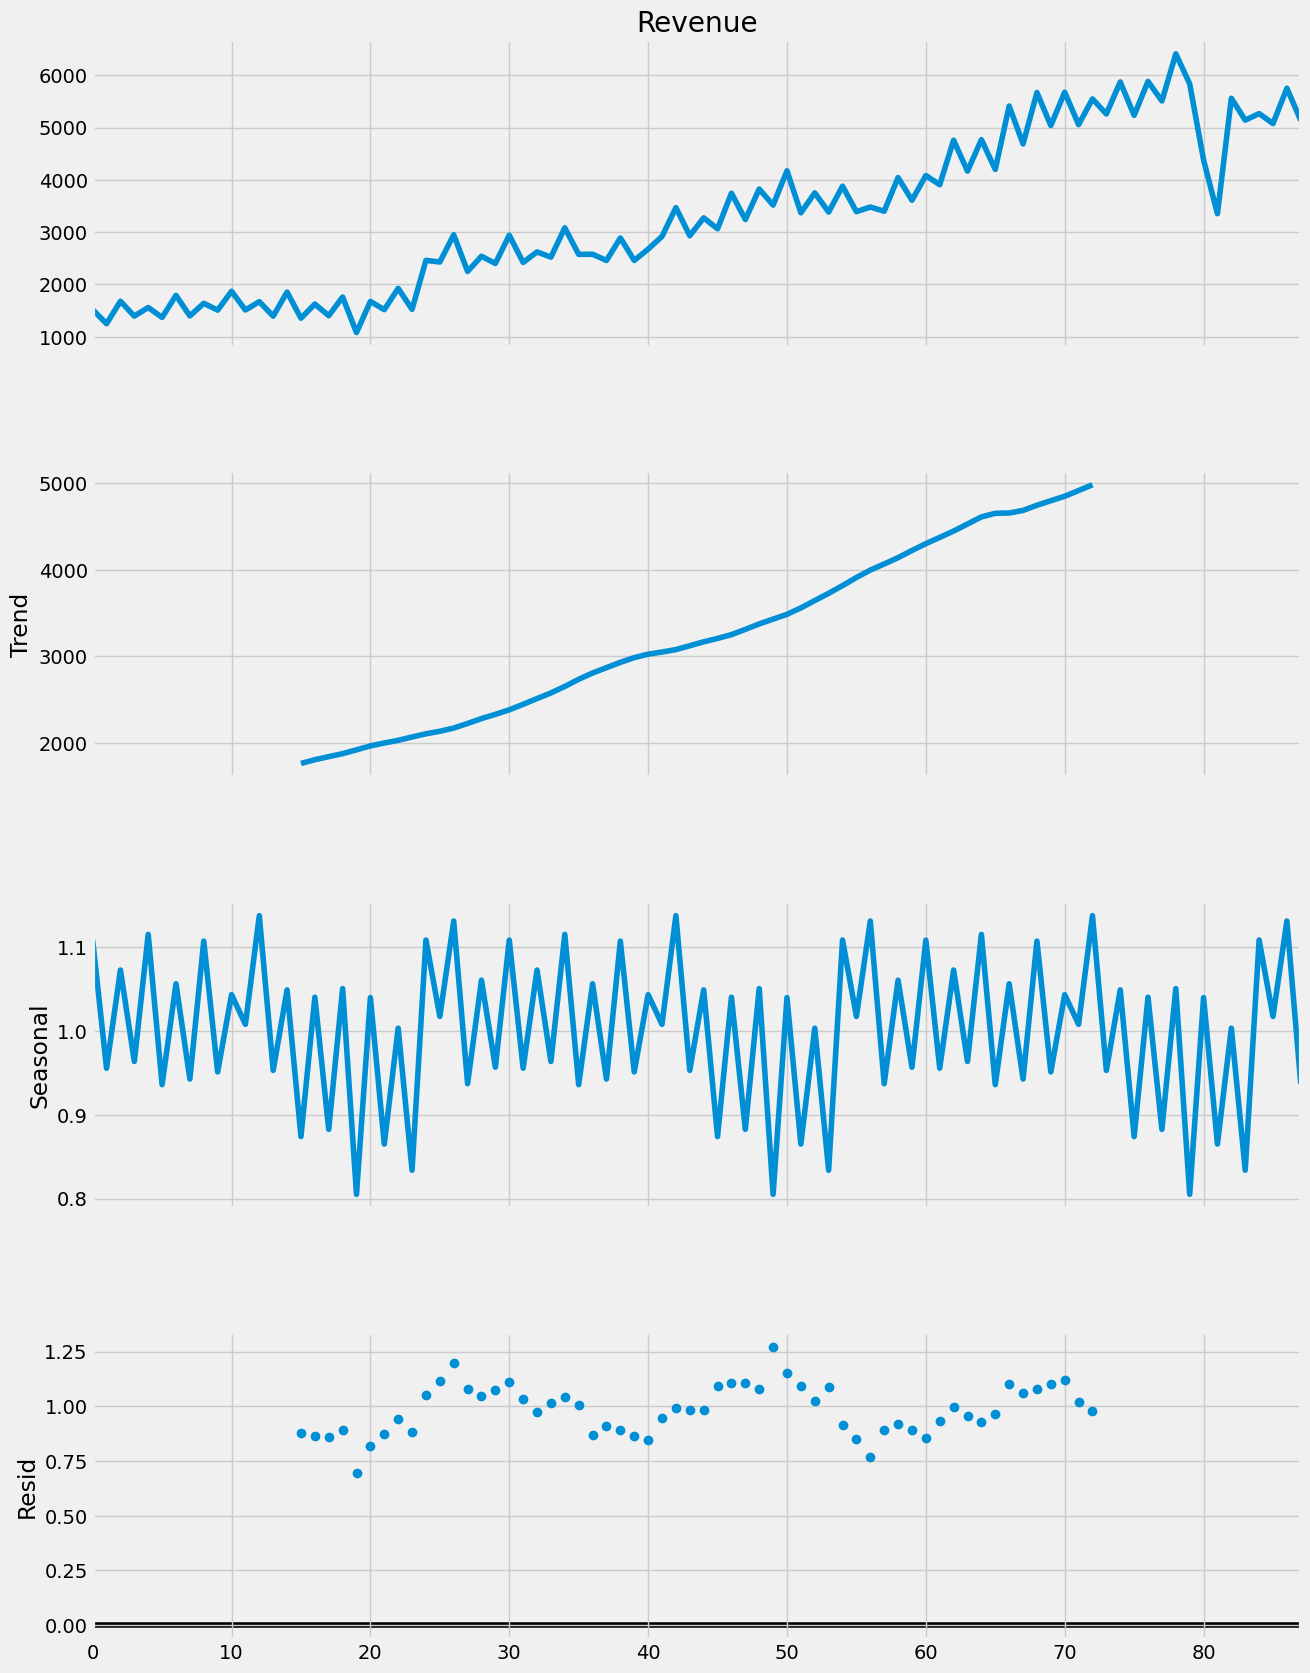

In [ ]:
result = seasonal_decompose(df["Revenue"], model='multiplicative', period=30)

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(15, 20)

# Show the plot
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

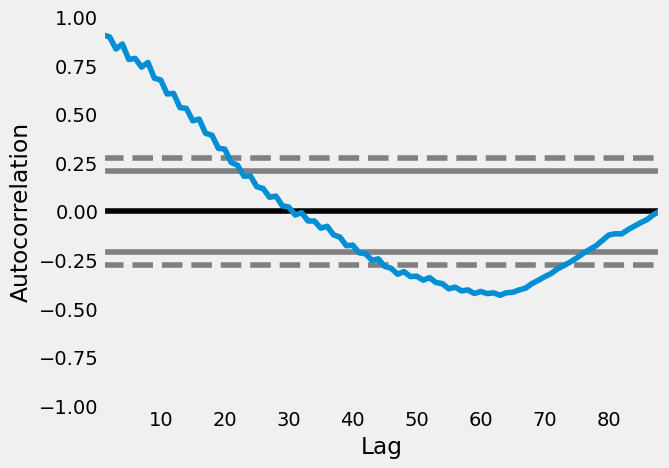

In [13]:
pd.plotting.autocorrelation_plot(df["Revenue"])

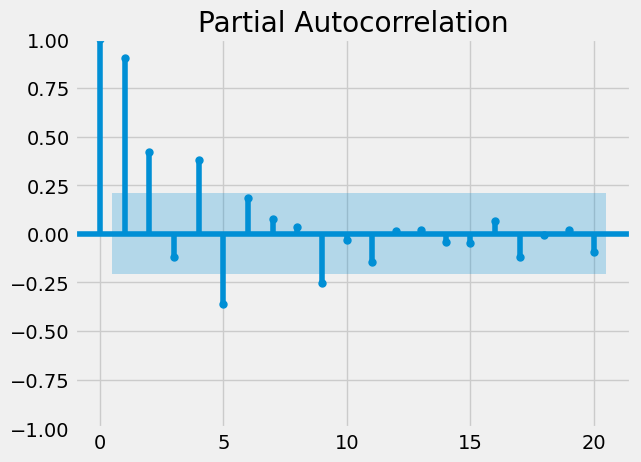

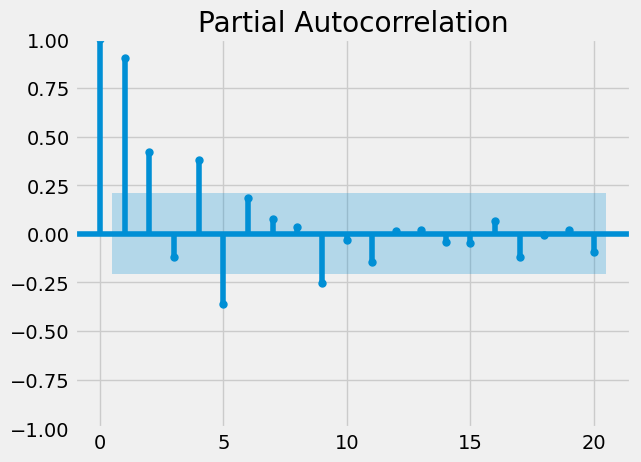

In [14]:
plot_pacf(df["Revenue"],lags = 20)

In [16]:
# Define the parameters for the SARIMAX model
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
s = 12 # Number of periods in a season (e.g., 12 for monthly data)

model=sm.tsa.statespace.SARIMAX(df['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Wed, 19 Jun 2024   AIC                           1106.564
Time:                                    17:05:14   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.546   

In [17]:

# for next eight quarters
predictions = model.predict(len(df), len(df)+7)
print(predictions)

88    5821.163245
89    5422.104735
90    6515.955097
91    5899.908612
92    6275.658026
93    5667.940633
94    6646.274345
95    6105.787876
Name: predicted_mean, dtype: float64


<Axes: >

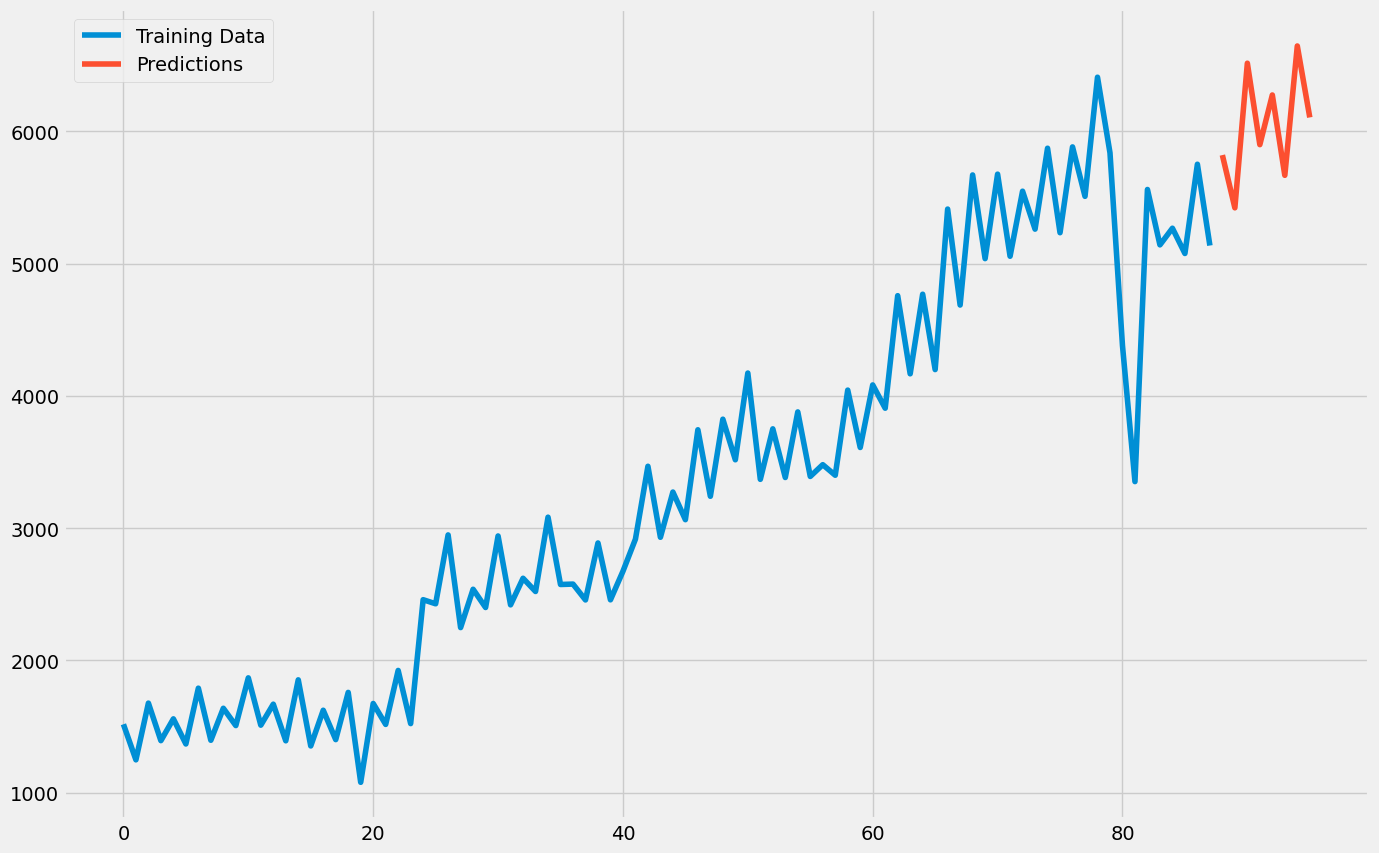

In [18]:
df["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")